<a href="https://colab.research.google.com/github/cosimo-schiavoni/Massive_Data_Project/blob/main/Cats_Dogs_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!rm -rf './Cats_Dogs_data/test'

In [5]:
!nvidia-smi

Thu Jul 28 00:48:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
# Keras / Deep Learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers, regularizers
#from tensorflow.keras.optimizers import Adam

from functools import reduce
from google.colab import files
import os
import zipfile
import numpy as np

#from my model
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import pickle
import shutil
import random
import skimage.io as io
from copy import deepcopy

from os import makedirs
from shutil import rmtree

import os
import zipfile
from os.path import join
from os import listdir, rmdir
from shutil import move

from PIL import Image

import os
import cv2
import imghdr
from PIL import Image

In [7]:
os.environ["data_source"] = "./Cats_Dogs_data"

if not os.path.exists(os.environ["data_source"]):
  os.makedirs(os.environ["data_source"])
  if "download" not in os.listdir():
    if "download.zip" not in os.listdir():
      ! wget https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip
      with zipfile.ZipFile("CatsDogs.zip", 'r') as f:
        f.extractall("CatsDogs")
    os.remove("CatsDogs.zip")

!mv "./CatsDogs/CatsDogs/Cats" "./Cats_Dogs_data"
!mv "./CatsDogs/CatsDogs/Dogs" "./Cats_Dogs_data"

!rm -rf CatsDogs

--2022-07-28 00:48:11--  https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip
Resolving unimibox.unimi.it (unimibox.unimi.it)... 159.149.53.190
Connecting to unimibox.unimi.it (unimibox.unimi.it)|159.149.53.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘CatsDogs.zip’

CatsDogs.zip            [                <=> ] 812.79M  1.31MB/s    in 2m 22s  

2022-07-28 00:50:35 (5.71 MB/s) - ‘CatsDogs.zip’ saved [852272294]



In [ ]:
#!rm -rf Cats_Dogs_data

In [8]:
###RGB CONVERTER

def check_channels(s_dir):
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        #print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:     
                try:
                  f_path=os.path.join (klass_path,f)        
                  im = Image.open(f_path)
                  rgb_im = im.convert("RGB")
                  os.remove(f_path)
                  rgb_im.save(f_path)
                except:
                  os.remove(f_path)

source_dir =r'./Cats_Dogs_data'
check_channels(source_dir)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [9]:
for root, dirs, files in os.walk(os.environ["data_source"]):
    if not files:
        continue
    prefix = os.path.basename(root)
    for f in files:
        os.rename(os.path.join(root, f), os.path.join(root, "{}_{}".format(prefix, f)))


In [10]:
for (root, dirs, file) in os.walk(os.environ["data_source"]):
  for d in dirs:
    for f in files:
      try:
        #print(join(os.environ["data_source"],d,d+'_'+f))
        move(join(os.environ["data_source"],d,d+'_'+f), join(os.environ["data_source"],d+'_'+f))
      except:
        next


!rm -rf "./Cats_Dogs_data/Cats"
!rm -rf "./Cats_Dogs_data/Dogs"


In [11]:
list_of_fnames = os.listdir('./Cats_Dogs_data')
print('Total number of of images in tmp/train is {0}'.format(len(list_of_fnames)))
list_of_cats_fnames = [i for i in list_of_fnames if 'CAT' in i.upper()]
list_of_dogs_fnames = [i for i in list_of_fnames if 'DOG' in i.upper()]
TOTAL_CATS = len(list_of_cats_fnames)
TOTAL_DOGS = len(list_of_dogs_fnames)
print('{0} CATS images'.format(TOTAL_CATS))
print('{0} DOGS images'.format(TOTAL_DOGS))

Total number of of images in tmp/train is 24997
12498 CATS images
12499 DOGS images


In [21]:
os.makedirs(os.path.join(os.environ["data_source"], 'train'))
os.makedirs(os.path.join(os.environ["data_source"], 'test'))
train_dir = os.path.join(os.environ["data_source"], 'train')
test_dir = os.path.join(os.environ["data_source"], 'test')

In [18]:
TRAIN_TEST_SPLIT_AT = 0.7
BATCH_SIZE = 64
TARGET_SIZE = (350, 350)
NO_OF_EPOCHS = 2
EXPERIMENT_SIZE = 12500
NO_OF_FOLDS = 5

In [19]:
print('\nDistributing images to \n {0} \n {1} \n'
      '\nsuch that {2}% of total number of images goes to training and \n'
      '{3}% goes to test'.format(
    train_dir,test_dir,
    round(TRAIN_TEST_SPLIT_AT * 100),
    round((1 - TRAIN_TEST_SPLIT_AT) * 100)))


Distributing images to 
 ./Cats_Dogs_data/train 
 ./Cats_Dogs_data/test 

such that 70% of total number of images goes to training and 
30% goes to test


In [22]:
from shutil import copyfile

np.random.shuffle(list_of_cats_fnames)
np.random.shuffle(list_of_dogs_fnames)

tmp_train_dir = os.path.join(os.environ["data_source"])
c = 0
for i in list_of_cats_fnames:
    if c < (round(TRAIN_TEST_SPLIT_AT * EXPERIMENT_SIZE)):
        copyfile(os.path.join(tmp_train_dir, i), os.path.join(train_dir, i))
    else:
        copyfile(os.path.join(tmp_train_dir, i), os.path.join(test_dir, i))
    c += 1
    if c >= EXPERIMENT_SIZE:
        break

c = 0
for i in list_of_dogs_fnames:
    if c < (round(TRAIN_TEST_SPLIT_AT * EXPERIMENT_SIZE)):
        copyfile(os.path.join(tmp_train_dir, i), os.path.join(train_dir, i))
    else:
        copyfile(os.path.join(tmp_train_dir, i), os.path.join(test_dir, i))
    c += 1
    if c >= EXPERIMENT_SIZE:
        break

print('Total training images :', len(os.listdir(train_dir)))
print('Total test images :', len(os.listdir(test_dir)))

Total training images : 17500
Total test images : 7497


In [12]:
train_X = [img_fname for img_fname in os.listdir(train_dir)]
train_X = np.array(train_X)
# 
train_labels = [l.split('/')[-1].split('_')[0].strip('0123456789') for l in train_X]
train_labels = np.array(train_labels)
# 
print ('Training shape:', train_X.shape, train_labels.shape) 
# 
print(train_X[:5], train_labels[:5])

Training shape: (18000,) (18000,)
['Cats_3149.jpg' 'Cats_11386.jpg' 'Dogs_7334.jpg' 'Cats_143.jpg'
 'Cats_4972.jpg'] ['Cats' 'Cats' 'Dogs' 'Cats' 'Cats']


In [ ]:
def get_compiled_model():
    # Make a simple 2-layer densely-connected neural network.
        ###Create CNN
    #Initialize the CNN
    cnn = tf.keras.models.Sequential()
     
    
    #DROPOUT
    #Introduce the Convolution layer with Kernel_initializer=Sobel_x
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',  input_shape = [350,350,3]))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,  strides=2, activation = 'relu'))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,  strides=2, activation = 'relu'))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Flattening
    cnn.add(tf.keras.layers.Flatten())
    #Full Connection
    cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
    #Output Layer
    cnn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))
    ###Training CNN
    #Compiling the CNN
    #cnn.compile(loss=my_loss_fn, optimizer=SGOptimizer(learning_rate=0.001))
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import sklearn.model_selection as sklrn
import pandas as pd


def train_and_cross_validate (model, x_data, y_data, n_folds=NO_OF_FOLDS, epochs=NO_OF_EPOCHS, batch_size=BATCH_SIZE):
    # 
    scores = []
    
    #  Loading images through generators ...
    train_datagen = ImageDataGenerator(rescale=1. / 255.,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)    
    validation_datagen = ImageDataGenerator(rescale=1. / 255)

    # prepare cross validation
    kfold = sklrn.KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    FoldsSetNo = 0 
    for train_ix, test_ix in kfold.split(x_data):
        print ('Folds Set # {0}'.format(FoldsSetNo))
        # select rows for train and test
        xx_train, yy_train, xx_test, yy_test = \
            x_data[train_ix], y_data[train_ix], x_data[test_ix], y_data[test_ix]

     # flow training images in batches for the current folds set
        # for training         
        train_generator = train_datagen.flow_from_dataframe(
            dataframe = pd.DataFrame({'id':xx_train,'label':yy_train}), 
            directory=train_dir, 
            x_col='id',
            y_col='label',
            batch_size=batch_size,
            target_size=TARGET_SIZE,
            class_mode='binary',
            shuffle = False)
        
                # and for validation         
        validation_generator = validation_datagen.flow_from_dataframe(
            dataframe = pd.DataFrame({'id':xx_test,'label':yy_test}), 
            directory=train_dir, 
            x_col='id',
            y_col='label',
            batch_size=batch_size,
            target_size=TARGET_SIZE,
            class_mode='binary',
            shuffle=False)


        # fit the model
        history = model.fit(train_generator,
                            epochs=epochs,  # The more we train the more our model fits the data
                            batch_size=batch_size,  # Smaller batch sizes = samller steps towards convergence
                            validation_data=validation_generator,
                            verbose=1)
        # store scores
        scores.append({'acc':np.average(history.history['accuracy']),'val_acc':np.average(history.history['val_accuracy'])})
        FoldsSetNo +=1
    return scores
print('Starting training and k-fold cross validation ...')
       


Starting training and k-fold cross validation ...


In [ ]:
model = get_compiled_model()
scores = train_and_cross_validate(model, train_X, train_labels)

Folds Set # 0
Found 14400 validated image filenames belonging to 2 classes.
Found 3600 validated image filenames belonging to 2 classes.
Epoch 1/2
225/225 [==============================] - 381s 2s/step - loss: 0.6684 - accuracy: 0.5822 - val_loss: 0.6079 - val_accuracy: 0.6756
Epoch 2/2
225/225 [==============================] - 384s 2s/step - loss: 0.6120 - accuracy: 0.6658 - val_loss: 0.5805 - val_accuracy: 0.6975
Folds Set # 1
Found 14400 validated image filenames belonging to 2 classes.
Found 3600 validated image filenames belonging to 2 classes.
Epoch 1/2
225/225 [==============================] - 382s 2s/step - loss: 0.5837 - accuracy: 0.6890 - val_loss: 0.5316 - val_accuracy: 0.7250
Epoch 2/2
225/225 [==============================] - 379s 2s/step - loss: 0.5602 - accuracy: 0.7092 - val_loss: 0.5111 - val_accuracy: 0.7394
Folds Set # 2
Found 14400 validated image filenames belonging to 2 classes.
Found 3600 validated image filenames belonging to 2 classes.
Epoch 1/2
225/225 [==

In [ ]:
from sklearn.metrics import zero_one_loss

y_pred = model.predict(test_dataset).ravel()
#zero_one_loss(y_pred, y_pred, normalize=False)
y_pred

array([0.52814347, 0.639305  , 0.58729655, ..., 0.5146479 , 0.49731883,
       0.6825872 ], dtype=float32)

In [ ]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

#predictions = (predictions - min(predictions)) / ( max(predictions)- min(predictions))
#predictions = np.random.uniform(-1, 1,12)

#predictions = tf.nn.sigmoid(predictions)
#predictions = tf.where(predictions > 0.51, 1, 0)
predictions

array([0.54735667, 0.37014982, 0.19914474, 0.3520912 , 0.5189715 ,
       0.7231875 , 0.556296  , 0.76940703, 0.45756906, 0.45084986,
       0.36924872, 0.3987768 , 0.4550795 , 0.9305877 , 0.51387334,
       0.4383488 , 0.46318626, 0.25220096, 0.8987313 , 0.54308945,
       0.46941397, 0.48927966, 0.8609631 , 0.39242685, 0.2790653 ,
       0.5354528 , 0.49158597, 0.49265915, 0.5316476 , 0.38318717,
       0.51743704, 0.61199087, 0.64912105, 0.5383641 , 0.56768864,
       0.4208544 , 0.5122613 , 0.4930925 , 0.49925166, 0.42634374,
       0.53847975, 0.56340575, 0.5367634 , 0.47395656, 0.34319946,
       0.40270385, 0.3479511 , 0.40514725, 0.5967939 , 0.4759806 ,
       0.33720008, 0.35755274, 0.52030027, 0.41355413, 0.48804492,
       0.5093468 , 0.6299228 , 0.4612274 , 0.4771779 , 0.572484  ,
       0.5024766 , 0.37528676, 0.546446  , 0.27898705], dtype=float32)

In [ ]:
from sklearn.metrics import zero_one_loss

image_batch, label_batch = test_dataset.as_numpy_iterator().next()
#predictions = model.predict_on_batch(image_batch).flatten()

y_pred = model.predict(image_batch).ravel()
print(len(y_pred))
#y_pred = tf.nn.sigmoid(y_pred)
y_true = y_pred * random.random ()
y_true = tf.where(y_true > 0.51, 1, 0)
y_pred = tf.where(y_pred > 0.51, 1, 0)


zero_one_loss(y_true, y_pred)


64


0.296875

In [ ]:

# Test the model on all available devices.
model.evaluate(test_dataset)

23/23 [==============================] - 5s 158ms/step - loss: 0.4414 - accuracy: 0.8003


[0.4414014518260956, 0.80027174949646]

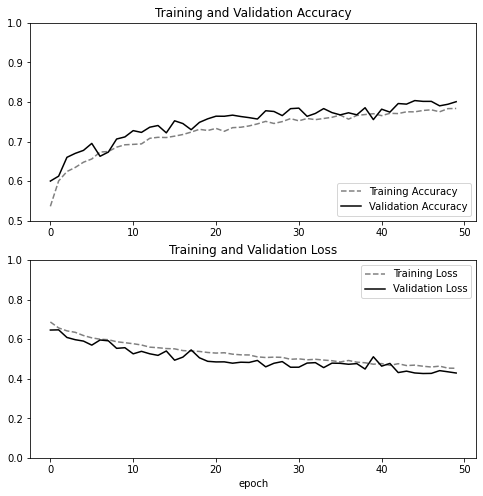

In [ ]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss_ = model_fit.history['loss']
val_loss_ = model_fit.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color = 'gray',linestyle='dashed')
plt.plot(val_acc, label='Validation Accuracy', color = 'black')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_, label='Training Loss', color = 'gray',linestyle='dashed')
plt.plot(val_loss_, label='Validation Loss', color = 'black')
plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
